In [1]:
# Load modules
import cfd_simulate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import three_desc_model as exponential_new
from itertools import combinations
from cutoffs import Polynomial
import GP_functions1 as GP
from GP_functions1 import TurbineUtility

In [2]:
!pip install GPy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/software/easybuild/software/Python/3.10.4-GCCcore-11.3.0/bin/python -m pip install --upgrade pip' command.


In [2]:
# Constants
min_dist = 279.0
max_xdist = 4000
max_width = 500
numturb = 3

In [3]:
#Set up neighbourlist calculation
# USE NEW CLASSES
turbine_utility = TurbineUtility()
nl = turbine_utility.nl
nl=exponential_new.NeighborlistCalculator(cutoff=4001,cone_grad=0.12582561117875557, cone_offset=72.24947126849844)
symbol="Siemens"
turb = [symbol]

In [8]:
while True:
    # Generate random coordinates
    turbines = np.zeros([numturb,2])
    for i in range(1,numturb):
        # X coordinate from triangular distribution (mode 0)
        turbines[i,0]=np.random.triangular(0,0,max_xdist)
        # y coordinate from triangular distribution (mode 0)
        turbines[i,1]=np.random.triangular(-max_width,0,max_width)
    print(turbines)
    neigh=nl.calculate(turb*numturb,turbines) # And here
    print(neigh)
    # Check neighbours
    for i in range(numturb):
        if (len(neigh[i])==numturb-1):
            # if one of them has maximal number of neigbours: break loop
            break
    else:
        # If none of them has maximal number of neighbours: Try again
        print("Not enough neighbours")
        continue
    # Check distances
    for i, j in combinations(range(numturb), 2):
        if (np.linalg.norm(turbines[i]-turbines[j])<min_dist):
            # Two turbines are too close
            print("Distance between turbine ",i+1," and turbine ",j+1," is too low.")
            break
    else:
        # None of the turbines are too close: SUCCESS!
        break
    continue


[[   0.            0.        ]
 [2027.47155492  107.17834107]
 [2457.55296746  225.22576854]]
[[], [0], [0, 1]]


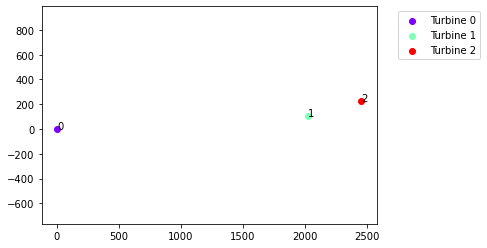

In [9]:
# turbines = np.array(...)
numturb = turbines.shape[0]

# Rainbow colormap with as many colors as turbines
cmap = plt.get_cmap('rainbow', numturb)

# Plot turbines
for i in range(numturb):
    plt.scatter(turbines[i,0], turbines[i,1], color=cmap(i), label='Turbine ' + str(i))

# Set the desired limits for the x and yaxes
plt.xlim(-300, 4500)
plt.ylim(-500, 500)
plt.axis('equal')

# Add labels to each point
for i in range(numturb):
    plt.text(turbines[i, 0], turbines[i, 1], str(i))

# Add legends
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()




In [11]:
turbine_coords = np.array(turbines)
sim_number = 5
cfd_simulate.simulate(turbine_coords, sim_number)

mkdir: cannot create directory ‘simulation/0005’: File exists
Restoring modules from user's mesh
Ignore invalid FOAM_CONFIG_ETC = etc/easybuild


/*---------------------------------------------------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  v2006                                 |
|   \\  /    A nd           | Website:  www.openfoam.com                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
Build  : v2006 OPENFOAM=2006
Arch   : "LSB;label=32;scalar=64"
Exec   : blockMesh
Date   : Jul 15 2024
Time   : 13:26:56
Host   : godzilla.csc.warwick.ac.uk
PID    : 889901
I/O    : uncollated
Case   : /home/eng/estrmx/storage/cfd_gp/Mesh_creation
nProcs : 1
trapFpe: Floating point exception trapping enabled (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 5, maxFil

--> FOAM IOWarning :
    Found [v1012] 'convertToMeters' entry instead of 'scale' in dictionary "/home/eng/estrmx/storage/cfd_gp/Mesh_creation/constant/polyMesh/blockMeshDict" 

    This keyword is deemed to be 114 months old.



Creating points with scale 1
    Block 0 cell size :
        i : 60 .. 60
        j : 24 .. 24
        k : 3.90926 .. 78.1851


There are no merge patch pairs

Writing polyMesh with 0 cellZones
----------------
Mesh Information
----------------
  boundingBox: (-3000 -1200 0) (3000 1200 2000)
  nPoints: 826281
  nCells: 800000
  nFaces: 2426000
  nInternalFaces: 2374000
----------------
Patches
----------------
  patch 0 (start: 2374000 size: 16000) name: frontAndBack
  patch 1 (start: 2390000 size: 8000) name: inlet
  patch 2 (start: 2398000 size: 8000) name: outlet
  patch 3 (start: 2406000 size: 10000) name: ground
  patch 4 (start: 2416000 size: 10000) name: sky

End

/*---------------------------------------------------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  v2006                                 |


Determined cells to refine in = 0.17 s
Selected for direction x refinement : 159740 cells (out of 957644)
Edge intersection testing:
    Number of edges             : 3402656
    Number of edges to retest   : 1006621
    Number of intersected edges : 0
Refined mesh in = 12.52 s
Determined cells to refine in = 0.23 s
Selected for direction y refinement : 318720 cells (out of 1117384)
Edge intersection testing:
    Number of edges             : 4370014
    Number of edges to retest   : 1972721
    Number of intersected edges : 0
Refined mesh in = 21.95 s
Determined cells to refine in = 0.11 s
Selected for direction z refinement : 0 cells (out of 1436104)
After directional refinement iteration 1 : cells:1436104  faces:4370014  points:1498560
Cells per refinement level:
    0	817374
    1	618730

Directional shell refinement iteration 2
----------------------------------------

Determined cells to refine in = 0.24 s
Selected for direction x refinement : 34493 cells (out of 1436104)
Edge in

dupNonManifoldPoints : Found : 0 non-manifold points (out of 2047894)
Detected unsplittable baffles : 0

Merge refined boundary faces
----------------------------

Merging 0 sets of faces.

No faces merged ...

Merging all points on surface that
- are used by only two boundary faces and
- make an angle with a cosine of more than 0.707107.

No straight edges simplified and no points removed ...
Refined mesh : cells:1951863  faces:5950413  points:2047894
Cells per refinement level:
    0	791622
    1	6979
    2	23537
    3	582388
    4	50153
    5	497184
Writing mesh to time 1
Wrote mesh in = 1.36 s.
Mesh refined in = 208.25 s.
Checking final mesh ...
Checking faces in error :
    non-orthogonality > 65  degrees                        : 982
    faces with face pyramid volume < 1e-13                 : 0
    faces with face-decomposition tet quality < 1e-30      : 0
    faces with concavity > 80  degrees                     : 0
    faces with skewness > 4   (internal) or 20  (boundary) : 0

0